# 1. 구글 플레이 스토어 W컨셉 리뷰 분석

## 분석 목적
W컨셉을 이용하는 안드로이드 이용자의 리뷰 분석을 통해 <br>
고객이 만족했던 서비스와 포인트를 찾아, 리뷰를 활성화 시킬 수 있는 포인트를 제시하고, <br>
불만족했던 서비스와 포인트를 파악하여 개선 포인트를 제시한다.

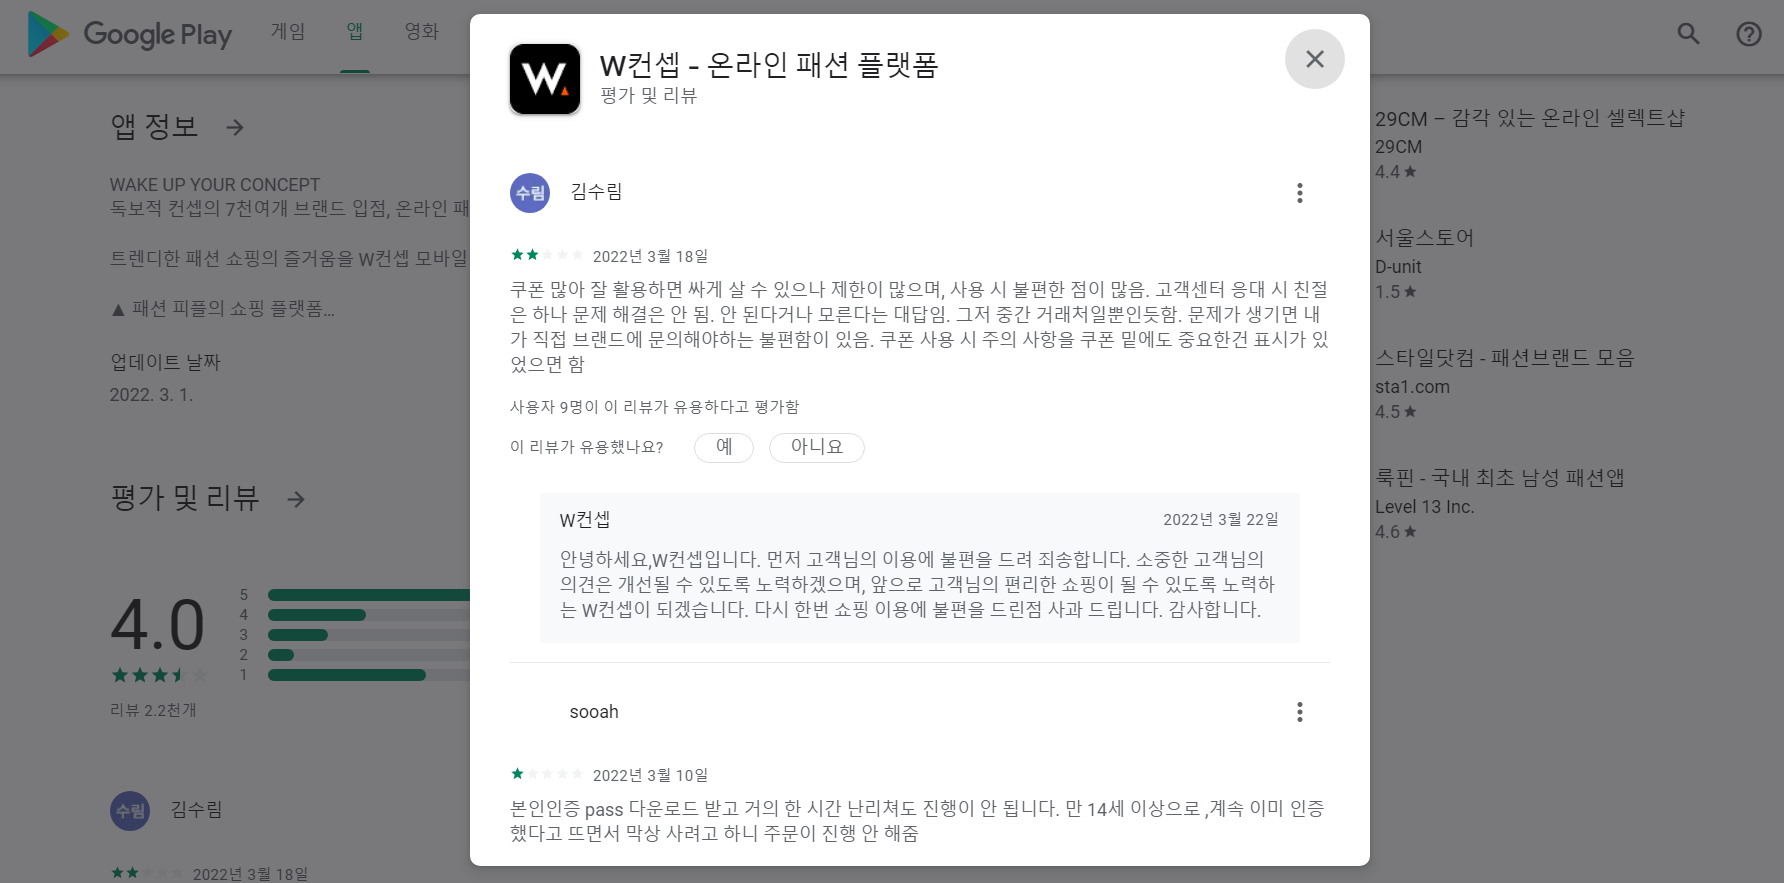

## 가설 설정
1. 5점을 남긴 고객은 **브랜드, 상품, 디자이너**를 많이 언급하며, 상품부분에서 만족했을 것이다.
2. 1점 평을 남긴 고객은 쿠폰 사용에 있어서 만족하지 않았을 것이다.
3. **속도, 업데이트**라는 키워드가 들어갔을 경우, 낮은 평점을 주었을 것이다.
4. 리뷰 중, 가장 빈번하게 등장하는 키워드는 **쿠폰** 일 것이다.
5. 고객의 리뷰는 안드로이드와 IOS에 큰 차이가 없을 것이다.
6. 프론트로우와 같은 특정 브랜드가 언급되는 리뷰가 있을 것이다.

## 분석방법
- google-play-scraper 패키지를 활용한 리뷰 데이터 크롤링
- KoNLPY 패키지를 활용한 한글 자연어 처리
- 빈번하게 언급된 키워드 파악
- Matplotlib 활용한 차트 시각화 (시간별 평점의 흐름 변화, 긍정/부정 비중 파이차트 비교)
- 워드 클라우드를 활용한 긍정리뷰 및 부정리뷰 시각화

# 2. 데이터셋
google-play-scraper 확장자를 인스톨한다

구글플래이 스토어 리뷰 스크랩퍼 관련 2022.01.06 15시 포스팅 <br>
https://strangefate.github.io/2022/01/06/AppReview-googleplayscraper/ <br><br>
w컨셉의 패키지명은 com.looket.wconcept 이다<br>
https://play.google.com/store/apps/details?id=com.looket.wconcept&hl=ko

In [4]:
# pip install google-play-scraper    #해당 패키지를 먼저 인스톨해준다.

Note: you may need to restart the kernel to use updated packages.
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.3-py3-none-any.whl size=24394 sha256=19ab6fbff9bb97e8b59c0439e8de2fe3e3a64c0a733fbac709207743a1fc7982
  Stored in directory: c:\users\cjksk\appdata\local\pip\cache\wheels\b0\17\bf\a06f635b5343780c7ec2b554dccc3aa4cf3ead928304088ad5
Successfully built google-play-scraper


## 패키지를 임포트하고, 리뷰를 result 변수에 저장한다.

In [14]:
from google_play_scraper import Sort, reviews_all         

In [13]:
#별점5점 데이터 수집 후 저장
result_5 = reviews_all(
    'com.looket.wconcept',   # APP ID
    sleep_milliseconds=0,     # 대기시간 설정, 앱개수가 많을 시 1000으로 Test
    lang='ko',                # 언어 설정
    country='kr',             # 국가 선택
    sort=Sort.MOST_RELEVANT,  # 관련성 높은 순서 소팅
    filter_score_with=5       # 별점5점만 필터링
)

In [22]:
result_5

[{'reviewId': 'gp:AOqpTOGF-yod0vQMI7CO4k2RMu1_WKZEBsIBcSiWgpq4tZM8E3vO9Si-2UTUg-hTXjTnBdplA4mqtA4p2Otoag',
  'userName': '윤설',
  'userImage': 'https://play-lh.googleusercontent.com/a-/AOh14GjmhBZlK0rag2ogt5Bdi7PjPQ-FRiCR1jnT6_oD2A',
  'content': '평소에 w컨셉에서 자주 구매하는 사용자입니다! 많은 브랜드가 모여있어서 무척 편리하고, 혜택도 많아서 좋아요. 그런데 엊그제부터 앱이 들어가지질 않습니다... 지웠다 깔아도 흰색 화면만 뜨고 메인창이 안 떠요. 무슨 오류인지 모르겠지만 얼른 고쳐주시길 바랍니다. 항상 잘 쓰고 있어요~',
  'score': 5,
  'thumbsUpCount': 33,
  'reviewCreatedVersion': '4.2.9',
  'at': datetime.datetime(2020, 5, 31, 14, 17, 14),
  'replyContent': '안녕하세요, 더블유컨셉입니다. 먼저 이용에 불편을 드려 죄송합니다. 남겨주신 내용은 현재 관련부서 확인중에있으며, 어플 사용이 개선 될 수 있도록 하겠습니다.  앞으로 좀 더 편리한 쇼핑이 될 수 있도록 서비스 안정화 및 설정에 최선을 다하겠습니다. 고객님의 소중한 의견 감사드립니다.',
  'repliedAt': datetime.datetime(2020, 6, 24, 16, 19, 59)},
 {'reviewId': 'gp:AOqpTOEsw3jzms0g5w2B7QrImdDVcg3DWPPZ_UiSzd7mn0wcZQWLoVtxP50fRftT6KbfifzXGRnma-unym0t9Q',
  'userName': 'YOUNG SU JU',
  'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJwEhWAjLiGjLTMOGbZV9EekOMH7Pb

In [2]:
#별점4점 데이터 수집 후 저장

result_4 = reviews_all(
    'com.looket.wconcept',   # APP ID
    sleep_milliseconds=0,     # 대기시간 설정, 앱개수가 많을 시 1000으로 Test
    lang='ko',                # 언어 설정
    country='kr',             # 국가 선택
    sort=Sort.MOST_RELEVANT,  # 관련성 높은 순서 소팅
    filter_score_with=4       # 별점4점만 필터링
)

In [17]:
#별점3점 데이터 수집 후 저장

result_3 = reviews_all(
    'com.looket.wconcept',   # APP ID
    sleep_milliseconds=0,     # 대기시간 설정, 앱개수가 많을 시 1000으로 Test
    lang='ko',                # 언어 설정
    country='kr',             # 국가 선택
    sort=Sort.MOST_RELEVANT,  # 관련성 높은 순서 소팅
    filter_score_with=3       # 별점3점만 필터링
)

In [18]:
#별점2점 데이터 수집 후 저장

result_2 = reviews_all(
    'com.looket.wconcept',   # APP ID
    sleep_milliseconds=0,     # 대기시간 설정, 앱개수가 많을 시 1000으로 Test
    lang='ko',                # 언어 설정
    country='kr',             # 국가 선택
    sort=Sort.MOST_RELEVANT,  # 관련성 높은 순서 소팅
    filter_score_with=2       # 별점2점만 필터링
)

In [5]:
#별점1점 데이터 수집 후 저장

result_1 = reviews_all(
    'com.looket.wconcept',   # APP ID
    sleep_milliseconds=0,     # 대기시간 설정, 앱개수가 많을 시 1000으로 Test
    lang='ko',                # 언어 설정
    country='kr',             # 국가 선택
    sort=Sort.MOST_RELEVANT,  # 관련성 높은 순서 소팅
    filter_score_with=1       # 별점1점만 필터링
)

In [23]:
# 리뷰
print(result_5[0]['content'])

평소에 w컨셉에서 자주 구매하는 사용자입니다! 많은 브랜드가 모여있어서 무척 편리하고, 혜택도 많아서 좋아요. 그런데 엊그제부터 앱이 들어가지질 않습니다... 지웠다 깔아도 흰색 화면만 뜨고 메인창이 안 떠요. 무슨 오류인지 모르겠지만 얼른 고쳐주시길 바랍니다. 항상 잘 쓰고 있어요~


In [12]:
# 평점
print(result_5[0]['score'])

2


In [8]:
# 작성일
print(result_5[0]['at'])

2022-03-18 17:51:10


In [9]:
# 작성자
print(result_5[0]['userName'])

김수림


## 서비스 만족도에 가까운 항목 인덱싱하여 변수로 저장하기

* review_score = 별점
* review_content = 작성내용
* review_date = 작성시기
* review_UserName = 작성자

In [8]:
review_score=[]
for i in range(20):
    num=result_5[i]['score']
    review_score.append(num)
review_score

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [9]:
review_content=[]
for i in range(20):
    content=result_5[i]['content']
    review_content.append(content)
review_content

['첫 주문완료하고 리뷰 남깁니다 개발자님 주문끝내고 홈버튼 눌러서 메인으로 가고나서 어플뒤로가기를 이용해서 종료를 할 수가 없네요 계속 방금전 주문하던페이지로 갑니다 이부분 개선해주시면 더 깔끔하게 사용할 듯 합니다~! 수고하세요^^',
 '예쁘고 다양한 상품을 합리적인 가격에 구매할 수 있는 좋은 쇼핑앱이라고 추천하고 싶어요!!!',
 '아직 좀 복잡하게 느껴지지만 특유의 모던함이 테마에 녹여져 있어서 좋아요~',
 '평소에 w컨셉에서 자주 구매하는 사용자입니다! 많은 브랜드가 모여있어서 무척 편리하고, 혜택도 많아서 좋아요. 그런데 엊그제부터 앱이 들어가지질 않습니다... 지웠다 깔아도 흰색 화면만 뜨고 메인창이 안 떠요. 무슨 오류인지 모르겠지만 얼른 고쳐주시길 바랍니다. 항상 잘 쓰고 있어요~',
 '다른 쇼핑몰 앱에 비해 빠르고 UI/UX 측면에서도 엄청 편리함다!!!',
 '디자이너들의 옷을 쉽게 접할 수 있어서 좋고 세일도 자주 해서 좋아요~',
 'HTTP Error 503. 해결해 주세요? 엡을 삭제하고 다시 깔아도 이런 에러 메시지가 뜹니다! W컨셉에 관련된 저의 마이페이지 등급도 다시 복구시켜 주세요? 포인트도 복구시켜 주세요? 저의 모든 구매 정보를 복구해 주세요? 손해가 엄청큽니다! 소송까지 갈수 있어요! 빠른 시일내에 복구가 이루어질꺼라 믿습니다! ^-♡',
 '잘 쓰고 있었는데 결제하기 누르니 화면이 안 넘어가네요 ㅠㅠ',
 '전반적으로 잘사용하고 있기는한데.. 푸쉬 알람이 와서 연결할시 로딩이 길거나 혹은 앱이 자동 종료되요. 맘에 드는 푸쉬여도 자꾸 튕기니까 불편사항이 생기네요.',
 '사이트, 앱 업데이트 이후 오류 건으로 리뷰를 남겼었는데 하루만에 개선 됐어요. 검색도 잘 되고, 긴 로딩시간 없이 상품이나 카테고리 선택 등 접속도 모두 잘 됩니다.',
 '이상하네요 렉이 자주 걸린다는 의견이 많았는데 저는 폰도좋은게 아닌데 항상잘되더라구요 여행용 옷을 자주 구입하는데 구입할때마다매우 만족합니다.ㅎ 찜해둔 상품이 있는데 쿠폰 

In [10]:
review_date=[]
for i in range(20):
    date=result_5[i]['at']
    review_date.append(date)
review_date

[datetime.datetime(2021, 11, 5, 21, 14, 50),
 datetime.datetime(2022, 1, 2, 14, 17, 38),
 datetime.datetime(2021, 11, 23, 23, 14, 3),
 datetime.datetime(2020, 5, 31, 14, 17, 14),
 datetime.datetime(2021, 10, 18, 22, 20, 11),
 datetime.datetime(2021, 10, 18, 1, 8, 49),
 datetime.datetime(2020, 11, 29, 21, 39, 58),
 datetime.datetime(2021, 10, 16, 13, 55, 55),
 datetime.datetime(2018, 12, 14, 11, 26, 20),
 datetime.datetime(2020, 7, 7, 2, 45, 33),
 datetime.datetime(2020, 4, 9, 13, 6, 6),
 datetime.datetime(2020, 7, 5, 23, 29, 18),
 datetime.datetime(2021, 8, 15, 12, 22, 28),
 datetime.datetime(2021, 9, 7, 22, 48),
 datetime.datetime(2021, 6, 25, 10, 8, 59),
 datetime.datetime(2021, 6, 25, 16, 35, 5),
 datetime.datetime(2021, 7, 4, 23, 34, 7),
 datetime.datetime(2021, 7, 12, 22, 16, 45),
 datetime.datetime(2021, 7, 16, 7, 59, 12),
 datetime.datetime(2019, 7, 13, 14, 29, 30)]

In [11]:
review_UserName=[]
for i in range(20):
    name=result_5[i]['userName']
    review_UserName.append(name)
review_UserName

['데이즈daze',
 'Jaeok Hwang',
 'voll cht',
 '윤설',
 'SangHyun Park',
 'daol',
 '이현희',
 '라니',
 'YOUNG SU JU',
 'Seolyeon Jo',
 'Lee Nicole',
 'ᄈᄈᄅᄈᄈ',
 '박윤희',
 'J.h W',
 '최gin',
 '김지선',
 '민나진',
 '배문진',
 '버니버니버니버니',
 'J MH']

## 데이터프레임 만들기

In [49]:
import pandas as pd

df = pd.DataFrame(result_5)
Review_Contents = ['userName','at','score','content']
Review_5 = df[Review_Contents]
Review_5

,userName,at,score,content
0,윤설,2020-05-31 14:17:14,5,평소에 w컨셉에서 자주 구매하는 사용자입니다! 많은 브랜드가 모여있어서 무척 편리하...
1,YOUNG SU JU,2018-12-14 11:26:20,5,전반적으로 잘사용하고 있기는한데.. 푸쉬 알람이 와서 연결할시 로딩이 길거나 혹은 ...
2,강은영,2022-04-01 14:58:43,5,한참동안 이용하지않다 다시 들어와보니 앱이 너무 좋아졌네요 상품 다양하고 자주 들어...
3,데이즈daze,2021-11-05 21:14:50,5,첫 주문완료하고 리뷰 남깁니다 개발자님 주문끝내고 홈버튼 눌러서 메인으로 가고나서 ...
4,SERIM,2022-02-21 02:01:29,5,쉽게 찾아볼 수 없는 마이너한 브랜드를 타 쇼핑몰보다 저렴하게 구매 완료!
...,...,...,...,...
358,Google 사용자,2017-01-22 15:48:42,5,Good
359,Google 사용자,2018-11-13 19:08:26,5,더블유 최고♥
360,김용삼,2020-08-29 09:34:57,5,좋아요
361,김경호,2017-07-06 21:57:04,5,좋아요


In [50]:
df = pd.DataFrame(result_4)
Review_4 = df[Review_Contents]
df = pd.DataFrame(result_3)
Review_3 =  df[Review_Contents]
df = pd.DataFrame(result_2)
Review_2 =  df[Review_Contents]
df = pd.DataFrame(result_1)
Review_1 =  df[Review_Contents]

In [51]:
Review_4

,userName,at,score,content
0,최효원,2021-11-14 04:34:30,4,오랫동안 이용하는 쇼핑사이트에요. 다양한 디자이너의 제품들을 만나볼 수 있어서 좋아...
1,Spex,2021-07-17 16:17:58,4,앱이 나온 지 얼마 안 됐는데도 정말 괜찮네요 근데 디테일이 살짝 아쉬운? 느낌이 ...
2,Mors Sola,2022-03-26 20:27:57,4,다 좋은데 리뷰신고 기능 만들어주세요. 아무말이나 휘갈기거나 엉뚱한사진 올린 리뷰들...
3,길현진,2022-03-04 10:10:42,4,상품을 보다가 자꾸 접속자수가 많다면서 멈춰요 서버 증설 더 해주세요ㅜㅜ 자꾸 끊기...
4,Laon Bahc,2022-02-22 16:06:32,4,상품 종류별로 찜한 목록을 카테고리별로 볼 수 있으면 좋겠어요. 일일이 찾기가 불편해요.
...,...,...,...,...
88,김무경,2015-07-07 14:47:47,4,전체적으로 깔끔하고 나쁘지않네요~
89,김진선,2015-05-25 17:24:06,4,업데이트했는데도 자꾸업뎃하라고 뜨네요 삭제하고다시 설치했는데도 똑같아요 왜이래요?
90,Google 사용자,2017-04-12 23:44:47,4,무신사느낌나서좋아요 무신사보다 싼거도많고
91,안녕하슙,2015-03-19 17:55:36,4,좋아용


In [40]:
Review_3

,userName,at,content,score
0,김*,2021-11-09 00:07:50,끔찍한 앱/모바일 사용성. 클릭할때마다 딜레이가 심해서 원치않는게 자꾸 눌리고 잘못...,3
1,스마일,2021-10-02 15:20:23,쿠폰 정책이 잘 되어있어서 평소에 자주 사용하고 있어요! 그런데 요즘 들어 앱이 버...,3
2,짭쪼롬달달,2021-08-04 17:23:26,"페이코 쇼핑적립 링크로 접속하면 앱이 자동실행되지 않아 너무 아쉽습니다. 지마켓, ...",3
3,밥해영,2022-04-01 14:29:28,"너무 잘쓰던 앱인데 언젠가부터 ""현재 서비스 접속이 원활하지 않습니다."" 이 문구가...",3
4,EYHIJ EEL,2022-04-02 23:49:20,"포토후기보면 ""현재 서비스 접속이 원활하지 않습니다"" 라고 뜰까요? 원래는 잘 볼 ...",3
...,...,...,...,...
78,윤지,2015-06-01 11:32:55,결제하려고 하면 중지되서 계속 시도하다가... 인터넷으로 들어가서 결제하니 바로 됩...,3
79,진아,2015-06-01 14:57:56,결제만하려면 오류나네요ㅠ,3
80,auto fiction,2015-05-24 21:46:18,둘러보기 좋습니다. 업그레이드 하라구해서 들어왔는데 뜨는게 없네요? 그리구 2000...,3
81,조소,2015-05-23 16:00:15,업데이트 안뜨는데 계속업데이트하라고해요ㅠㅠ,3


In [39]:
Review_2

,userName,at,content,score
0,김수림,2022-03-18 17:51:10,"쿠폰 많아 잘 활용하면 싸게 살 수 있으나 제한이 많으며, 사용 시 불편한 점이 많...",2
1,a kim,2021-10-02 16:51:54,이틀전부터 어플 시작하면 w컨셉 로고 나온 채로 멈추거나 첫 메인화면나온 후 멈추고...,2
2,Lemon Jin,2022-01-31 18:46:35,구매하려고 하면 옵션선택이 안되어있어서 구매 불가인 제품이 많음 행사 끝날때까지 그...,2
3,LEE JJEONG,2022-01-04 10:09:10,정말 유용하게 쓰던 사이트였는데 시작화면에서 정지되서는 며칠째 안들어가지네요.,2
4,Yeons Jung,2021-10-28 00:51:22,상품평에 사진 첨부 안 된다고요 몇 번이고 고객센터에 전화해도 자꾸 자기들은 아무 ...,2
...,...,...,...,...
66,김준서,2015-05-07 18:54:18,튕김현상이 있습니다. 하루빨리 개선해 주셨으면 좋겠습니다.,2
67,홍재후,2015-04-18 14:59:28,고쳐줘요,2
68,seunghee han,2015-03-25 00:25:28,하다가 자꾸 앱이중지됬다고 튕겨요,2
69,밍밍,2015-03-29 10:26:55,앱같다기보다는 웹느낌이 많이드네요,2


In [38]:
Review_1

,userName,at,content,score
0,최미인,2022-03-24 11:24:28,이렇게 접속 안 되는 앱은 처음입니다. '현재 서비스 접속이 원활하지 않습니다. 동...,1
1,소녀소년,2020-07-06 21:45:30,디자인 바뀌고 나서 너무 느려지고 클릭도 안됨... 전면 광고 돌아가는곳은 이미지가...,1
2,Evelyn J,2020-07-07 16:27:19,좀 전부터 앱 접속도 안될뿐더러 인터넷으로 쳐서 들어가도 접속 되지 않습니다. 접속...,1
3,Yoojin Choi,2019-04-10 15:38:35,더블유컨셉 자체는 옷도 이쁘고 좋은데. 앱은 엉망인듯. 앱과 pc버전 연동이 안되서...,1
4,gyk,2021-03-03 16:43:08,"어플이 정말 너무너무 구려요,,, 메인 홈 들어가면 뜨는 광고에 '오늘하루보지않기'...",1
...,...,...,...,...
323,Google 사용자,2017-02-10 11:49:56,설치한적 없는데 설치됐네요.,1
324,발라더닐스 [이진일],2016-01-29 11:45:20,어플다운이안되요,1
325,새밍,2018-03-21 03:14:22,렉이 심하고 자주 튕기네요.,1
326,문안휴,2018-06-29 19:16:53,앱이뭐예요~?,1


## 별점5점~1점 데이터 합치기

In [57]:
frames = [Review_5,Review_4,Review_3,Review_2,Review_1]
result = pd.concat(frames)
result

,userName,at,score,content
0,윤설,2020-05-31 14:17:14,5,평소에 w컨셉에서 자주 구매하는 사용자입니다! 많은 브랜드가 모여있어서 무척 편리하...
1,YOUNG SU JU,2018-12-14 11:26:20,5,전반적으로 잘사용하고 있기는한데.. 푸쉬 알람이 와서 연결할시 로딩이 길거나 혹은 ...
2,강은영,2022-04-01 14:58:43,5,한참동안 이용하지않다 다시 들어와보니 앱이 너무 좋아졌네요 상품 다양하고 자주 들어...
3,데이즈daze,2021-11-05 21:14:50,5,첫 주문완료하고 리뷰 남깁니다 개발자님 주문끝내고 홈버튼 눌러서 메인으로 가고나서 ...
4,SERIM,2022-02-21 02:01:29,5,쉽게 찾아볼 수 없는 마이너한 브랜드를 타 쇼핑몰보다 저렴하게 구매 완료!
...,...,...,...,...
323,Google 사용자,2017-02-10 11:49:56,1,설치한적 없는데 설치됐네요.
324,발라더닐스 [이진일],2016-01-29 11:45:20,1,어플다운이안되요
325,새밍,2018-03-21 03:14:22,1,렉이 심하고 자주 튕기네요.
326,문안휴,2018-06-29 19:16:53,1,앱이뭐예요~?


In [60]:
result.describe()

,score
count,938.000000
mean,3.098081
std,1.765003
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


In [58]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 0 to 327
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   userName  938 non-null    object        
 1   at        938 non-null    datetime64[ns]
 2   score     938 non-null    int64         
 3   content   938 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 36.6+ KB


In [66]:
result.shape

(938, 4)

In [71]:
result['score'].describe()

count    938.000000
mean       3.098081
std        1.765003
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: score, dtype: float64

In [73]:
result['score'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [72]:
result['userName'].nunique()

864

In [81]:
result.loc[3]    #인덱스 자르고 저장한뒤에(concat된것을) 전체 합쳐지면 그때다시 인덱스 줘보기 

,userName,at,score,content
3,데이즈daze,2021-11-05 21:14:50,5,첫 주문완료하고 리뷰 남깁니다 개발자님 주문끝내고 홈버튼 눌러서 메인으로 가고나서 ...
3,길현진,2022-03-04 10:10:42,4,상품을 보다가 자꾸 접속자수가 많다면서 멈춰요 서버 증설 더 해주세요ㅜㅜ 자꾸 끊기...
3,밥해영,2022-04-01 14:29:28,3,"너무 잘쓰던 앱인데 언젠가부터 ""현재 서비스 접속이 원활하지 않습니다."" 이 문구가..."
3,LEE JJEONG,2022-01-04 10:09:10,2,정말 유용하게 쓰던 사이트였는데 시작화면에서 정지되서는 며칠째 안들어가지네요.
3,Yoojin Choi,2019-04-10 15:38:35,1,더블유컨셉 자체는 옷도 이쁘고 좋은데. 앱은 엉망인듯. 앱과 pc버전 연동이 안되서...


In [91]:
star_5 = (result['score'] == 5)
result[star_5]

,userName,at,score,content
0,윤설,2020-05-31 14:17:14,5,평소에 w컨셉에서 자주 구매하는 사용자입니다! 많은 브랜드가 모여있어서 무척 편리하...
1,YOUNG SU JU,2018-12-14 11:26:20,5,전반적으로 잘사용하고 있기는한데.. 푸쉬 알람이 와서 연결할시 로딩이 길거나 혹은 ...
2,강은영,2022-04-01 14:58:43,5,한참동안 이용하지않다 다시 들어와보니 앱이 너무 좋아졌네요 상품 다양하고 자주 들어...
3,데이즈daze,2021-11-05 21:14:50,5,첫 주문완료하고 리뷰 남깁니다 개발자님 주문끝내고 홈버튼 눌러서 메인으로 가고나서 ...
4,SERIM,2022-02-21 02:01:29,5,쉽게 찾아볼 수 없는 마이너한 브랜드를 타 쇼핑몰보다 저렴하게 구매 완료!
...,...,...,...,...
358,Google 사용자,2017-01-22 15:48:42,5,Good
359,Google 사용자,2018-11-13 19:08:26,5,더블유 최고♥
360,김용삼,2020-08-29 09:34:57,5,좋아요
361,김경호,2017-07-06 21:57:04,5,좋아요


In [92]:
result[-star_5]   #5점인것만 뺴고 보기, (역필터걸기)

,userName,at,score,content
0,최효원,2021-11-14 04:34:30,4,오랫동안 이용하는 쇼핑사이트에요. 다양한 디자이너의 제품들을 만나볼 수 있어서 좋아...
1,Spex,2021-07-17 16:17:58,4,앱이 나온 지 얼마 안 됐는데도 정말 괜찮네요 근데 디테일이 살짝 아쉬운? 느낌이 ...
2,Mors Sola,2022-03-26 20:27:57,4,다 좋은데 리뷰신고 기능 만들어주세요. 아무말이나 휘갈기거나 엉뚱한사진 올린 리뷰들...
3,길현진,2022-03-04 10:10:42,4,상품을 보다가 자꾸 접속자수가 많다면서 멈춰요 서버 증설 더 해주세요ㅜㅜ 자꾸 끊기...
4,Laon Bahc,2022-02-22 16:06:32,4,상품 종류별로 찜한 목록을 카테고리별로 볼 수 있으면 좋겠어요. 일일이 찾기가 불편해요.
...,...,...,...,...
323,Google 사용자,2017-02-10 11:49:56,1,설치한적 없는데 설치됐네요.
324,발라더닐스 [이진일],2016-01-29 11:45:20,1,어플다운이안되요
325,새밍,2018-03-21 03:14:22,1,렉이 심하고 자주 튕기네요.
326,문안휴,2018-06-29 19:16:53,1,앱이뭐예요~?


In [95]:
result[result['content'].str.contains('쿠폰')]

,userName,at,score,content
2,강은영,2022-04-01 14:58:43,5,한참동안 이용하지않다 다시 들어와보니 앱이 너무 좋아졌네요 상품 다양하고 자주 들어...
12,이숙영,2022-03-01 23:54:10,5,더블쿠폰이 적용되는데 잘맞으면 짱임
19,서해선,2021-12-02 22:24:24,5,잘 사용하고있습니다!! 쿠폰도 맘에듬!!
20,Lee Nicole,2020-04-09 13:06:06,5,이상하네요 렉이 자주 걸린다는 의견이 많았는데 저는 폰도좋은게 아닌데 항상잘되더라구...
24,정미나,2021-11-08 14:40:00,5,좋네용. 예쁜 옷 많아서 첫 회원가입 후 쿠폰으로 싸게 샀어요
25,민나진,2021-07-04 23:34:07,5,요즘 제 쇼핑은 항상 여기서~ 새롭게 알게되는 브랜드도 반갑고 꽤 큰폭의 할인이 되...
28,jieun seo,2020-07-07 11:22:37,5,원래 애용하고 있었는데 요즘은 쿠폰도 더 많아지고 사이트가 전반적으로 더 세련돼졌네...
31,김지선,2021-06-25 16:35:05,5,디자이너 브랜드가 많아서 특이한 옷들을 구매할 수 있어서 좋구요 할인쿠폰과 이벤트가...
41,안토니,2021-11-06 23:47:27,5,지금 할인쿠폰도 주고 넘 좋네요
43,jieun shin,2021-12-19 02:12:21,5,흔하지 않은 옷들도 많구 쿠폰즘 많이주세요


In [98]:
result[result['content'].str.startswith('쿠폰')]

,userName,at,score,content
88,양지수,2019-01-01 03:11:45,5,쿠폰 적용하면 타 운영몰 보다 더 저렴하게 구매할 수 있어 좋아요
140,정재훈,2021-10-16 01:21:33,5,쿠폰 정책이 매우 잘 되어있음
251,이한나,2021-06-28 22:11:27,5,쿠폰짱
46,이현아,2021-07-12 00:19:03,4,쿠폰 마니 주세요.
1,스마일,2021-10-02 15:20:23,3,쿠폰 정책이 잘 되어있어서 평소에 자주 사용하고 있어요! 그런데 요즘 들어 앱이 버...
0,김수림,2022-03-18 17:51:10,2,"쿠폰 많아 잘 활용하면 싸게 살 수 있으나 제한이 많으며, 사용 시 불편한 점이 많..."
176,안상희,2020-11-21 09:58:41,1,쿠폰발행한거 못쓰게하려고 다운로드 안되게하는건가요?
192,한주인,2021-05-21 11:56:03,1,쿠폰 막아서 가입한걸 오지게 후회시키네


# 데이터탐색 해보기 + 문제 해결하기 #

1. 쿠폰과 싸게가 동시에 들어간 문장 찾기
2. 1~5점별로 각각 인덱스가 있는 문제 해결하기
3. 글작성에 nan 이나 결측치 있는지 확인하기

## 특정 단어 들어간 리뷰만 추출하기

In [54]:
Review_5[Review_5['content'].str.contains('쿠폰')]

,userName,at,score,content
2,강은영,2022-04-01 14:58:43,5,한참동안 이용하지않다 다시 들어와보니 앱이 너무 좋아졌네요 상품 다양하고 자주 들어...
12,이숙영,2022-03-01 23:54:10,5,더블쿠폰이 적용되는데 잘맞으면 짱임
19,서해선,2021-12-02 22:24:24,5,잘 사용하고있습니다!! 쿠폰도 맘에듬!!
20,Lee Nicole,2020-04-09 13:06:06,5,이상하네요 렉이 자주 걸린다는 의견이 많았는데 저는 폰도좋은게 아닌데 항상잘되더라구...
24,정미나,2021-11-08 14:40:00,5,좋네용. 예쁜 옷 많아서 첫 회원가입 후 쿠폰으로 싸게 샀어요
25,민나진,2021-07-04 23:34:07,5,요즘 제 쇼핑은 항상 여기서~ 새롭게 알게되는 브랜드도 반갑고 꽤 큰폭의 할인이 되...
28,jieun seo,2020-07-07 11:22:37,5,원래 애용하고 있었는데 요즘은 쿠폰도 더 많아지고 사이트가 전반적으로 더 세련돼졌네...
31,김지선,2021-06-25 16:35:05,5,디자이너 브랜드가 많아서 특이한 옷들을 구매할 수 있어서 좋구요 할인쿠폰과 이벤트가...
41,안토니,2021-11-06 23:47:27,5,지금 할인쿠폰도 주고 넘 좋네요
43,jieun shin,2021-12-19 02:12:21,5,흔하지 않은 옷들도 많구 쿠폰즘 많이주세요


In [14]:
Review_5[Review_5['content'].str.contains('브랜드')]

,userName,at,content,score
4,윤설,2020-05-31 14:17:14,평소에 w컨셉에서 자주 구매하는 사용자입니다! 많은 브랜드가 모여있어서 무척 편리하...,5
16,김지선,2021-06-25 16:35:05,디자이너 브랜드가 많아서 특이한 옷들을 구매할 수 있어서 좋구요 할인쿠폰과 이벤트가...,5
17,민나진,2021-07-04 23:34:07,요즘 제 쇼핑은 항상 여기서~ 새롭게 알게되는 브랜드도 반갑고 꽤 큰폭의 할인이 되...,5
18,배문진,2021-07-12 22:16:45,여러 브랜드를 한 눈에 보고 맘에 드는 상품 겟하기에 아주 적합한 앱입니당 ~ 애용...,5
19,버니버니버니버니,2021-07-16 07:59:12,예쁜브랜드가 너무많아요♡ 쿠폰도 자주주고 넘 좋아요. 반품도 용이하구요,5
29,SERIM,2022-02-21 02:01:29,쉽게 찾아볼 수 없는 마이너한 브랜드를 타 쇼핑몰보다 저렴하게 구매 완료!,5
47,Minkyung Kim,2022-04-01 10:41:10,예쁜 브랜드가 많아요,5
54,Ahreum Kang,2021-07-24 20:22:28,너무 좋은 브랜드들이 많이 입점 되있어 쇼핑하기 최적의 앱이 아닐까 싶어요~ 할인 ...,5
63,신은형,2018-11-13 00:50:09,내취향브랜드가 많아서 좋지만 신진디자이너들이 너무 비싸게받아서ㅎ;,5
66,knelly 98,2021-07-02 11:47:13,반품 접수가 신속하고 고객응대가 좋음 다양한 브랜드에 쿠폰 행사도 많음,5


## 데이터를  csv 파일로 저장하기

In [55]:
# 전체 데이터 저장하기
result.to_csv('wConcept_storeReview_All.csv', sep=',', index = False, encoding='utf-8-sig')

In [56]:
# 5점 데이터 저장하기
Review_5.to_csv('wConcept_storeReview_5.csv', index = False, encoding='utf-8-sig') # csv로 저장

In [16]:
df = pd.read_csv('wConcept_storeReview_5.csv')
df.head(49)  #50개만 먼저 확인하기

,userName,at,content,score
0,강은영,2022-04-01 14:58:43,한참동안 이용하지않다 다시 들어와보니 앱이 너무 좋아졌네요 상품 다양하고 자주 들어...,5
1,데이즈daze,2021-11-05 21:14:50,첫 주문완료하고 리뷰 남깁니다 개발자님 주문끝내고 홈버튼 눌러서 메인으로 가고나서 ...,5
2,voll cht,2021-11-23 23:14:03,아직 좀 복잡하게 느껴지지만 특유의 모던함이 테마에 녹여져 있어서 좋아요~,5
3,Jaeok Hwang,2022-01-02 14:17:38,예쁘고 다양한 상품을 합리적인 가격에 구매할 수 있는 좋은 쇼핑앱이라고 추천하고 싶...,5
4,윤설,2020-05-31 14:17:14,평소에 w컨셉에서 자주 구매하는 사용자입니다! 많은 브랜드가 모여있어서 무척 편리하...,5
5,SangHyun Park,2021-10-18 22:20:11,다른 쇼핑몰 앱에 비해 빠르고 UI/UX 측면에서도 엄청 편리함다!!!,5
6,daol,2021-10-18 01:08:49,디자이너들의 옷을 쉽게 접할 수 있어서 좋고 세일도 자주 해서 좋아요~,5
7,이현희,2020-11-29 21:39:58,HTTP Error 503. 해결해 주세요? 엡을 삭제하고 다시 깔아도 이런 에러 ...,5
8,라니,2021-10-16 13:55:55,잘 쓰고 있었는데 결제하기 누르니 화면이 안 넘어가네요 ㅠㅠ,5
9,YOUNG SU JU,2018-12-14 11:26:20,전반적으로 잘사용하고 있기는한데.. 푸쉬 알람이 와서 연결할시 로딩이 길거나 혹은 ...,5


## koNLPy 패키지로 단어 빈도 추출하기

In [17]:
from konlpy.tag import Okt
from collections import Counter

total = open('wConcept_storeReview_5.csv', 'r', encoding = 'utf-8')
total_keywords = total.read()
okt = Okt()
noun = okt.nouns(total_keywords)
count = Counter(noun)
total_keywords_list = count.most_common(100) #많은순으로 xx 개 출력해줌
total_keywords_list

[('앱', 62),
 ('옷', 38),
 ('쇼핑', 37),
 ('상품', 35),
 ('브랜드', 34),
 ('컨셉', 33),
 ('쿠폰', 32),
 ('사용', 30),
 ('구매', 27),
 ('사용자', 27),
 ('자주', 26),
 ('수', 26),
 ('할인', 25),
 ('제품', 20),
 ('더블유', 17),
 ('이벤트', 17),
 ('가격', 16),
 ('이용', 14),
 ('정말', 14),
 ('굿', 14),
 ('매일', 14),
 ('쇼핑몰', 13),
 ('애용', 12),
 ('아주', 11),
 ('후', 10),
 ('더', 9),
 ('좀', 9),
 ('항상', 9),
 ('사이트', 9),
 ('카테고리', 9),
 ('것', 9),
 ('보기', 9),
 ('내', 8),
 ('용', 8),
 ('요', 8),
 ('디자인', 8),
 ('패션', 8),
 ('최고', 8),
 ('곳', 8),
 ('혜택', 7),
 ('계속', 7),
 ('디자이너', 7),
 ('접', 7),
 ('저', 7),
 ('정보', 7),
 ('맘', 7),
 ('때', 7),
 ('설치', 7),
 ('제', 7),
 ('개', 7),
 ('편집', 7),
 ('볼', 7),
 ('스타일', 7),
 ('모바일', 7),
 ('건', 6),
 ('구입', 6),
 ('매우', 6),
 ('요즘', 6),
 ('여기', 6),
 ('앞', 6),
 ('아이템', 6),
 ('물건', 6),
 ('한번', 6),
 ('사랑', 6),
 ('가장', 6),
 ('리뷰', 5),
 ('오류', 5),
 ('다른', 5),
 ('엡', 5),
 ('일단', 5),
 ('적립금', 5),
 ('별', 5),
 ('중', 5),
 ('알림', 5),
 ('김', 5),
 ('온라인', 5),
 ('다시', 4),
 ('주문', 4),
 ('메인', 4),
 ('어플', 4),
 ('합리', 4),
 ('화면', 4),


## 텍스트만 text로 저장해주기

In [18]:
Review_5['content'].to_csv('wConcept_storeReview_5.txt', index = False, encoding='utf-8-sig') # txt로 저장

In [19]:
text = pd.read_csv('wConcept_storeReview_5.txt')
text

,content
0,한참동안 이용하지않다 다시 들어와보니 앱이 너무 좋아졌네요 상품 다양하고 자주 들어...
1,첫 주문완료하고 리뷰 남깁니다 개발자님 주문끝내고 홈버튼 눌러서 메인으로 가고나서 ...
2,아직 좀 복잡하게 느껴지지만 특유의 모던함이 테마에 녹여져 있어서 좋아요~
3,예쁘고 다양한 상품을 합리적인 가격에 구매할 수 있는 좋은 쇼핑앱이라고 추천하고 싶...
4,평소에 w컨셉에서 자주 구매하는 사용자입니다! 많은 브랜드가 모여있어서 무척 편리하...
...,...
420,Good
421,더블유 최고♥
422,좋아요
423,좋아요


# 데이터 시각화하기

## 긍정리뷰 VS 부정리뷰 (막대그래프, 히스토그램)

## Word Cloud

### 긍정 리뷰 (평점 5점)

In [20]:
from wordcloud import WordCloud

#텍스트를 불러옵니다.
with open('wConcept_storeReview_5.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외(조사나 잘못 추출된 단어 제외)

Allscore= Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

(-0.5, 1499.5, 1499.5, -0.5)

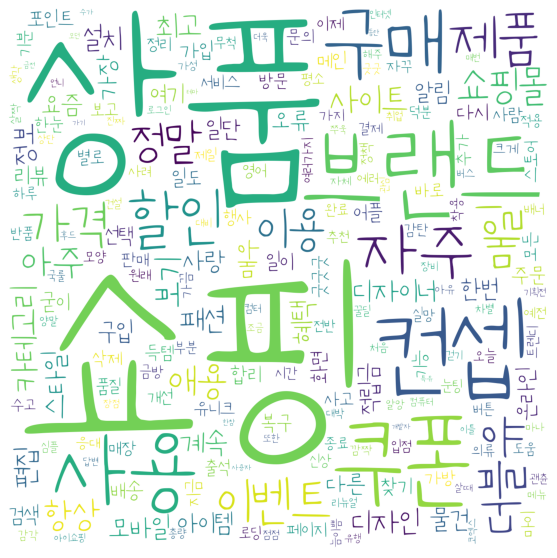

In [21]:
import matplotlib.pyplot as plt

wc = WordCloud(font_path='C:/Users/cjksk/anaconda3/envs/datascience/lib/site-packages/matplotlib/mpl-data/fonts/ttf/나눔손글씨 암스테르담.ttf', 
               width=300, 
               height=300, 
               scale=5.0, 
               max_font_size=150,
               background_color='white')
gen = wc.generate_from_frequencies(Allscore)
plt.figure(figsize=(10,10))
plt.imshow(gen)
plt.axis('off')

### 부정 리뷰 (평점 1점)

In [22]:
result_1 = reviews_all(
    'com.looket.wconcept',
    sleep_milliseconds=0, # defaults to 0
    lang='ko', # defaults to 'en'
    country='kr', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT 관련성 높은 순서 소팅?
    filter_score_with=1 # defaults to None(means all score)   별점5점만 필터링해서 보여줌.
)

In [23]:
result_1

[{'reviewId': 'gp:AOqpTOGPUdEK5k2rYxYUdGykWCn8E3MUjfjp47kBMljDLed-Q8lfBKmaLsSqB65nw4Wt_LJxw1UXHCDt5IXr3g',
  'userName': '최미인',
  'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJyTX6PDXMvgPbpp4FqNi4KEpfNlOC2G215vdSSm=mo',
  'content': "이렇게 접속 안 되는 앱은 처음입니다. '현재 서비스 접속이 원활하지 않습니다. 동시에 접속하는 고객 수기 많거나 네트워크 상태가 불안정하여 (이하생략)' 해도해도 너무해서 글 남깁니다. 앱 구매를 권장했으면 시스템 관리를 제대로 해야하는 거 아닙니까.. 요즘 세상에 네트워크 연결 안 되는 곳이 어디있겠습니까.. 새벽 2시 3시에도 동시 접속 고객 수가 많으면 얼마나 많다고 접속 자체가 안 됩니까..",
  'score': 1,
  'thumbsUpCount': 7,
  'reviewCreatedVersion': '5.0.3',
  'at': datetime.datetime(2022, 3, 24, 11, 24, 28),
  'replyContent': '안녕하세요,W컨셉입니다.먼저 고객님의 이용에 불편을 드려 죄송합니다.자세한 확인이 필요하여 번거로우시겠지만 W컨셉 고객센터 (1566-5027)로 고객님의 연락 부탁 드립니다. 고객님의 편리한 쇼핑이 될 수 있도록 서비스 안정화에 노력하는 W컨셉이 되겠습니다. 감사합니다.',
  'repliedAt': datetime.datetime(2022, 3, 24, 11, 56, 4)},
 {'reviewId': 'gp:AOqpTOFDxV-u4cEFsWF-yJlL9ZvJbpFJYtJDS5ts-X3RlsOOnwmgud42utUr5f369ajtAiaJpt7qDlN2DOUeWA',
  'userName': '소녀소년',
  'userImage': 'https://play-lh.googleu

In [28]:
review_score=[]
for i in range(20):
    num=result_1[i]['score']
    review_score.append(num)
    
review_date=[]
for i in range(20):
    num=result_1[i]['at']
    review_score.append(num)

    review_content=[]
for i in range(20):
    content=result_1[i]['content']
    review_content.append(content)

review_UserName=[]
for i in range(20):
    name=result_1[i]['userName']
    review_UserName.append(name)


content_df=pd.DataFrame(result_1, columns=['content'])
score_df=pd.DataFrame(result_1, columns=['score'])
date_df=pd.DataFrame(result_1, columns=['at'])
userName_df=pd.DataFrame(result_1, columns=['userName'])

df_concat=pd.concat([date_df,userName_df,score_df,content_df],axis=1)
df_concat

df_concat.to_csv('wConcept_storeReview_1.csv', index = False, encoding='utf-8-sig') # csv로 저장
df = pd.read_csv('wConcept_storeReview_1.csv')
df.head(49)  

df_concat['content'].to_csv('wConcept_storeReview_1.txt', index = False) # txt로 저장

In [126]:
df.head(49)  #50개만 먼저 확인하기

,at,userName,score,content
0,2020-07-06 21:45:30,소녀소년,1,디자인 바뀌고 나서 너무 느려지고 클릭도 안됨... 전면 광고 돌아가는곳은 이미지가...
1,2020-07-07 16:27:19,Evelyn J,1,좀 전부터 앱 접속도 안될뿐더러 인터넷으로 쳐서 들어가도 접속 되지 않습니다. 접속...
2,2019-04-10 15:38:35,Yoojin Choi,1,더블유컨셉 자체는 옷도 이쁘고 좋은데. 앱은 엉망인듯. 앱과 pc버전 연동이 안되서...
3,2021-03-03 16:43:08,gyk,1,"어플이 정말 너무너무 구려요,,, 메인 홈 들어가면 뜨는 광고에 '오늘하루보지않기'..."
4,2020-09-09 20:25:26,NAJO YA,1,옷 하나보고 되돌아가기 누르면 무조건 전페이지 맨위상단이어서 다시 밑으로 내려가야됨...
5,2019-04-18 03:30:06,박말구,1,어제 점심 때 부터 인증이 안되어 있는 일부 컨테츠 어쩌구 하면서 이미지가 깨지고 ...
6,2019-12-11 00:28:04,그린애플티,1,앱을 바꿔야할때가 왔나봅니다. 같은상품인데 다른사이트랑 비교하면 다른데에 비해 훨 ...
7,2022-03-10 10:13:37,sooah,1,본인인증 pass 다운로드 받고 거의 한 시간 난리쳐도 진행이 안 됩니다. 만 14...
8,2022-01-27 21:20:33,김윤미,1,지금 몇주째 계속 처음 화면에서 멈추거나 팝업 광고창에서 멈춤니다. 생일쿠폰이랑 앱...
9,2021-11-13 10:05:23,소선,1,개발자님 이 문제 좀 고쳐주세요 푸쉬 알림 눌렀을 때 하얀 화면만 나오고 접속이 안...


In [24]:
# 리뷰 최근순으로 정렬하기
df.sort_values(['at'], ascending=False)

,userName,at,content,score
0,강은영,2022-04-01 14:58:43,한참동안 이용하지않다 다시 들어와보니 앱이 너무 좋아졌네요 상품 다양하고 자주 들어...,5
47,Minkyung Kim,2022-04-01 10:41:10,예쁜 브랜드가 많아요,5
147,ᄉᄀᄇᄉᄀᄇ,2022-03-21 12:23:09,10프로쿠폰 많이쥬세요,5
269,고희정,2022-03-20 10:10:12,좋아요,5
38,kim현모대마왕,2022-03-07 21:37:13,가입후 할인주문해서 좋아요,5
...,...,...,...,...
406,Dylan Lee,2015-03-10 23:35:10,조아욤,5
403,이수연,2015-03-10 11:13:48,좋네요,5
413,제라드,2015-03-10 04:21:59,이용많이해야지 좋네여,5
405,박수현,2015-03-09 21:33:16,짱! 조아요,5


In [30]:
total = open('wConcept_storeReview_1.csv', 'r', encoding = 'utf-8')
total_keywords = total.read()
okt = Okt()
noun = okt.nouns(total_keywords)
count = Counter(noun)
total_keywords_list = count.most_common(100) #많은순으로 xx 개 출력해줌
total_keywords_list

[('앱', 155),
 ('어플', 57),
 ('왜', 55),
 ('로그인', 54),
 ('계속', 45),
 ('업데이트', 41),
 ('상품', 39),
 ('다시', 38),
 ('안', 31),
 ('화면', 31),
 ('접속', 30),
 ('좀', 30),
 ('오류', 27),
 ('것', 26),
 ('진짜', 25),
 ('삭제', 24),
 ('쿠폰', 24),
 ('뭐', 24),
 ('사용자', 24),
 ('구매', 23),
 ('가입', 23),
 ('때', 22),
 ('페이지', 22),
 ('고객', 21),
 ('쇼핑', 21),
 ('옷', 21),
 ('거', 20),
 ('더', 20),
 ('설치', 19),
 ('번', 19),
 ('해결', 19),
 ('자체', 17),
 ('문제', 17),
 ('아이디', 17),
 ('광고', 16),
 ('다른', 16),
 ('사용', 16),
 ('후', 15),
 ('시간', 15),
 ('해도', 14),
 ('개선', 14),
 ('수', 14),
 ('다운', 14),
 ('자꾸', 14),
 ('리뷰', 13),
 ('문의', 13),
 ('최악', 13),
 ('실행', 13),
 ('처음', 12),
 ('정말', 12),
 ('버전', 12),
 ('함', 12),
 ('그', 12),
 ('또', 12),
 ('하나', 11),
 ('환불', 11),
 ('결제', 11),
 ('알림', 11),
 ('사람', 11),
 ('요', 11),
 ('회원', 11),
 ('클릭', 10),
 ('이미지', 10),
 ('컨셉', 10),
 ('물건', 10),
 ('센터', 10),
 ('취소', 10),
 ('이', 10),
 ('아예', 10),
 ('교환', 10),
 ('여기', 10),
 ('정보', 10),
 ('상세', 10),
 ('재', 9),
 ('폰', 9),
 ('확인', 9),
 ('사이트', 9),
 ('바로', 9),
 (

(-0.5, 1499.5, 1499.5, -0.5)

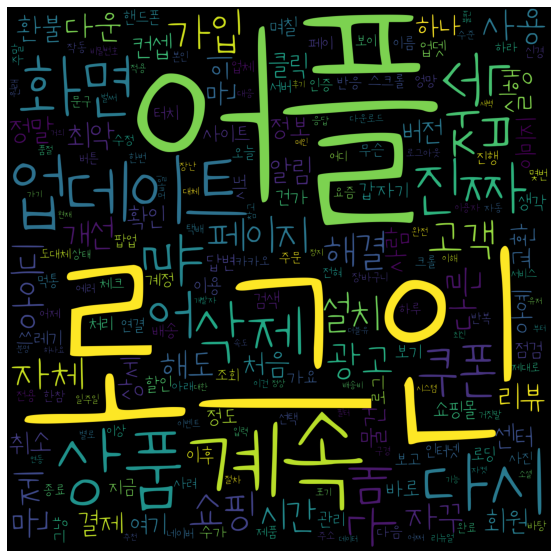

In [31]:
#텍스트를 불러옵니다.
with open('wConcept_storeReview_1.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외(조사나 잘못 추출된 단어 제외)

Allscore= Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

wc = WordCloud(font_path='C:/Users/cjksk/anaconda3/envs/datascience/lib/site-packages/matplotlib/mpl-data/fonts/ttf/나눔손글씨 암스테르담.ttf', 
               width=300, 
               height=300, 
               scale=5.0, 
               max_font_size=150,
               background_color='black')
gen = wc.generate_from_frequencies(Allscore)
plt.figure(figsize=(10,10))
plt.imshow(gen)
plt.axis('off')

In [32]:
# 평점1점인 리뷰 중에서, '상품' 키워드가 들어간 리뷰를 최신순으로 조회하기

con_product = df_concat[df_concat['content'].str.contains('상품')]
con_product.sort_values(['at'], ascending=False)

,at,userName,score,content
19,2021-12-22 12:21:07,강민지,1,광고를 보고 누르면 앱에 게시된 그 상품을 볼 수 있는게 아니라 구글스토어를 통한 ...
134,2021-11-25 15:31:30,ovo,1,상품이 클릭이 안되면 어쩌자는겁니까? 앱이 먹통에요아주 쓰레기같은앱
123,2021-08-19 09:58:19,강재희,1,처음엔 다른곳보다 좋아서 계속 사용중이였는데 점점 실망이네요 상품의 질도 형편이 없...
72,2021-07-01 10:04:42,from layla레이라,1,원래 쿠폰은 모든상품 일괄적용이였는데 어느새 상품1개당 쿠폰1개 적용으로 바껴서 할...
58,2021-01-18 08:29:32,Sujung Park,1,브랜드 페이지의 상품 페이지에서 다음 페이지로 넘어가지 않습니다. 예쁜 옷은 참 많...
64,2021-01-16 20:33:31,Ahreum Park,1,진짜욕심많은 낚시앱이다. 인스타광고로유인을했으면 그 상품을좀찾을수있게하던가. 낚시질...
20,2020-07-06 22:46:18,Tori,1,업데이트 하고 필터링 기능도 안되고 상품상세도 느리고 모든 화면은 우리나라 데이터 ...
1,2020-07-06 21:45:30,소녀소년,1,디자인 바뀌고 나서 너무 느려지고 클릭도 안됨... 전면 광고 돌아가는곳은 이미지가...
142,2020-06-09 21:47:10,홍우인,1,상품을 누르면 이후에 화면으로 안넘어가고 정보가 안보이네요 빨리 고쳐주세요
181,2019-12-11 18:49:14,June H,1,W컨셉 진짜 최악의 쇼핑몰... 상품구매했는데 제조사가 취소했다고 갑자기 덜컥 취소...


# 결론

# 코드공유